# ALP Data Mining

Nama : Trisha Alexis Likorawung
<br>
NIM : 0706022110037


# Student Prediction

What you have to do...
1. Perform data preparations to clean data
2. Exploratory Data Analysis (explore the distributions and characteristics of the columns and compare variables to view their behavior and relationships)
3. Cluster the data using K-Means, Hierarchical Clustering
4. Create a prediction model using any classification algorithm and compare the results
5. Submit your result through Github with the code run and showing results

<h3>Import Modul</h3>

In [49]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, AgglomerativeClustering
from kneed import KneeLocator
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline


<h3>Import Dataset</h3>

In [8]:
url = "https://raw.githubusercontent.com/Trsh16/ALP-DATMIN/main/data.csv"
df = pd.read_csv(url,delimiter=";")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


<h3>Data Cleaning And Data Preparation</h3>

In [9]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [10]:
#Check missing value
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [11]:
#Check Duplicate
df.duplicated().sum()

0

In [12]:
#Label Encode
label_encoder = LabelEncoder()
df_encode = df.copy()
df_encode['Target'] = label_encoder.fit_transform(df_encode['Target'])
df_encode.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [13]:
#Scaling
numerical_columns = df_encode.select_dtypes(include=['float64', 'int64']).columns

if 'Target' in numerical_columns:
    numerical_columns = numerical_columns.drop(['Target'])

scaler = StandardScaler()

df_scaled = df_encode.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

df_scaled.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,2
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,2
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,2


<H3>EDA

In [14]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


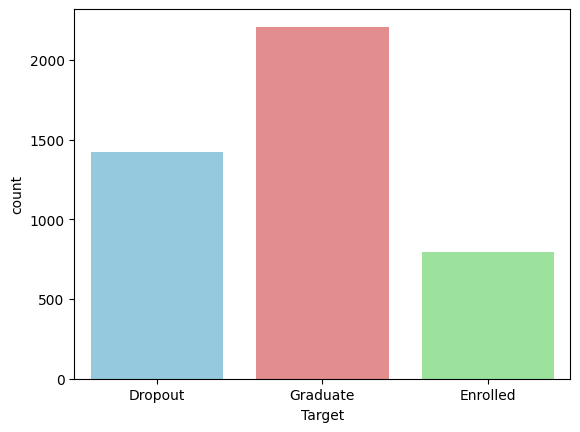

In [15]:
target_colors = ['skyblue', 'lightcoral', 'lightgreen']
sns.countplot(x='Target', data=df, palette=target_colors, hue="Target")
plt.show()

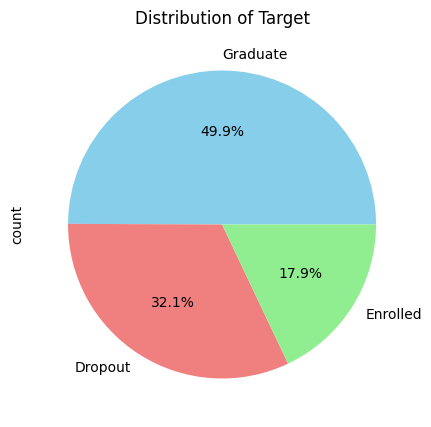

In [16]:
target_colors = ['skyblue', 'lightcoral', 'lightgreen']

plt.figure(figsize=(6, 5))
df['Target'].value_counts().plot.pie(autopct='%1.1f%%', colors=target_colors)
plt.title('Distribution of Target')
plt.show()

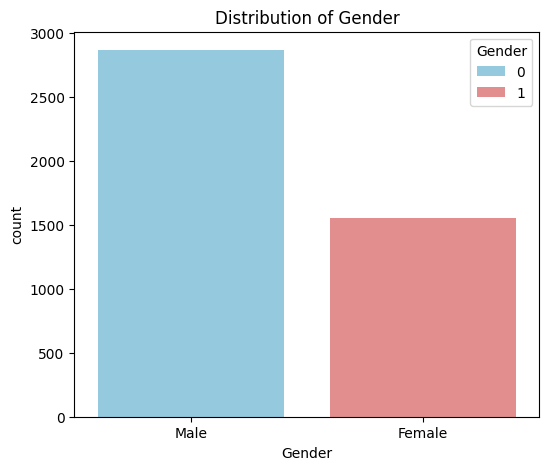

In [97]:
plt.figure(figsize=(6, 5))
colors = ['skyblue', 'lightcoral']
sns.countplot(x='Gender', data=df, palette=colors, hue='Gender')
plt.title('Distribution of Gender')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

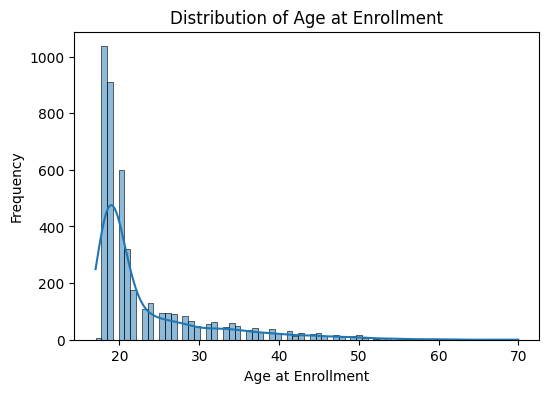

In [18]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age at enrollment'], kde=True)
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.show()

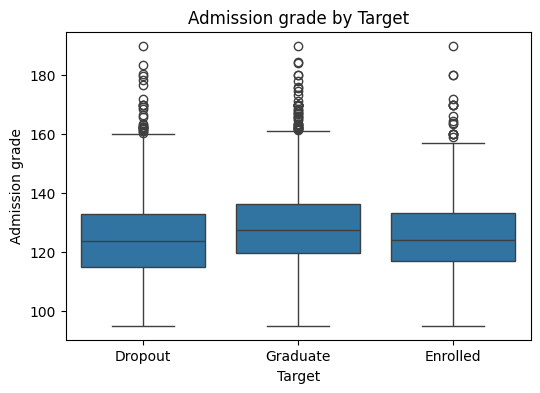

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Target', y='Admission grade', data=df)
plt.title('Admission grade by Target')
plt.xlabel('Target')
plt.ylabel('Admission grade')
plt.show()

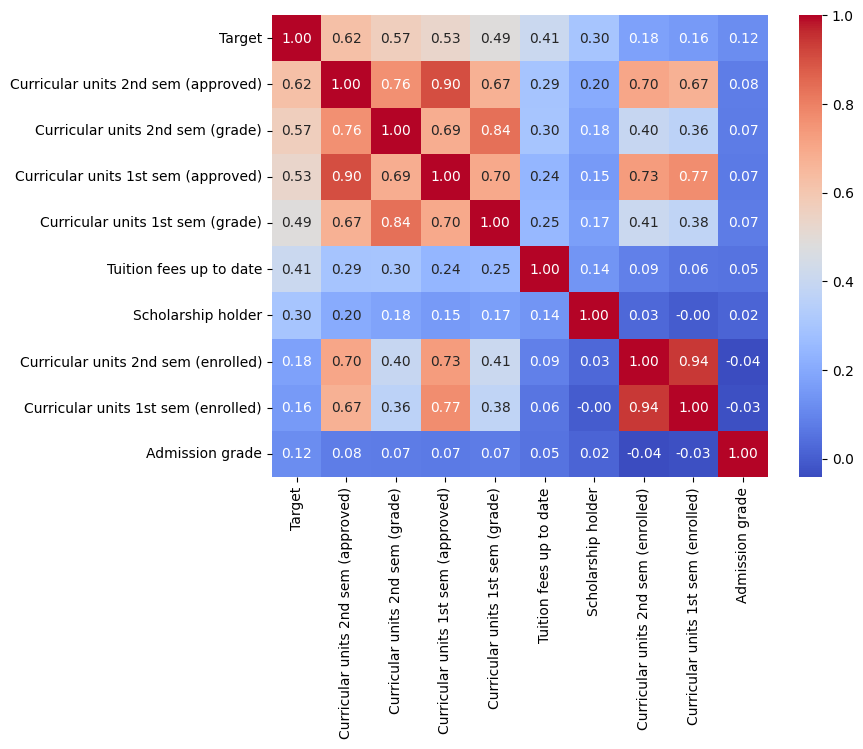

In [20]:
top_corr_columns =  df_scaled.corr().nlargest(10, 'Target')['Target'].index
top_corr_matrix = df_scaled[top_corr_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

<h3>Clustering

In [21]:
df_cluster = df_scaled.copy()

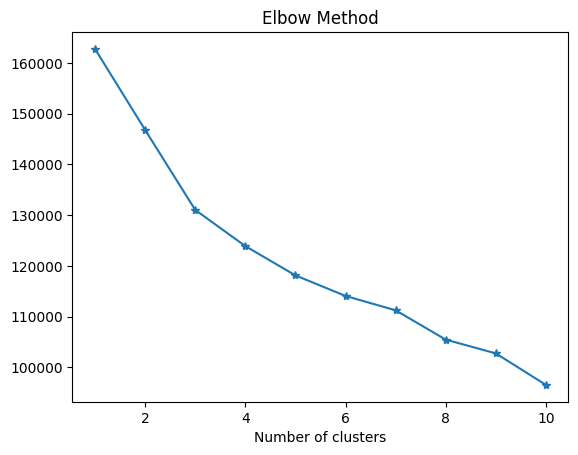

In [22]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto',random_state=42)
    kmeans.fit(df_cluster)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

In [23]:
findknee = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("the best k for your model is ",findknee.elbow)

the best k for your model is  3


In [29]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_scaled.copy())

cluster_labels = kmeans.labels_
df['Target'] = cluster_labels
df.head()

C:\Users\trish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


<function matplotlib.pyplot.show(close=None, block=None)>

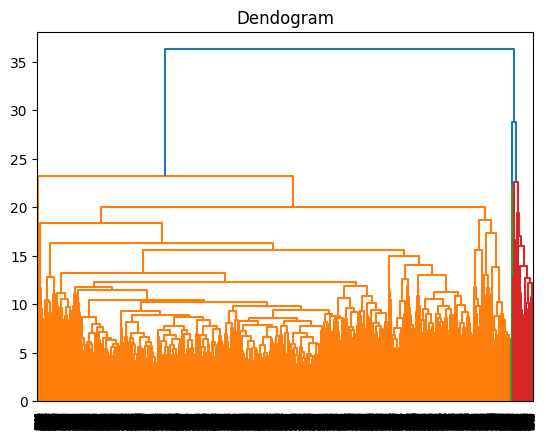

In [27]:
dist_matrix = sch.linkage(df_scaled, method='complete')
dn = sch.dendrogram(dist_matrix)
plt.title('Dendogram')
plt.show

In [95]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels = clustering.fit_predict(df_scaled.copy())

df['Cluster'] = cluster_labels

numeric_cols = df.select_dtypes(include=[int, float]).columns
categorical_cols = df.select_dtypes(include=[object]).columns

cluster_stats = df.groupby("Cluster").agg({
    **{col: "mean" for col in numeric_cols},
    **{col: lambda x: x.mode().iloc[0] for col in categorical_cols}, 
    "Cluster": "count"
})

cluster_stats.columns = df.columns
cluster_stats.head()

C:\Users\trish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Hierarchical Cluster,Cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.179931,17.080450,1.805652,9279.242215,0.905421,4.319493,132.694954,2.076125,19.337082,22.164937,...,8.504037,4.895905,11.997655,0.177336,11.542215,1.206142,0.067261,0.089389,0.0,3468
1,1.295019,32.881226,1.141762,7890.214559,0.735632,8.172414,131.605364,1.501916,22.494253,24.984674,...,14.183908,9.923372,12.688296,0.137931,11.321073,1.352490,-0.053372,1.835249,1.0,261
2,1.128058,21.258993,1.559712,7110.833094,0.876259,4.516547,132.584460,1.000000,19.582734,21.808633,...,3.565468,0.079137,0.487650,0.020144,11.777554,1.290504,-0.303050,0.953957,2.0,695


<h3>Classification

In [36]:
df_class = df_scaled.copy()

In [43]:
X = df_class.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "Logistic regression"
]

In [44]:
classifiers = [
    KNeighborsClassifier(5),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=15, max_features=15, random_state=0),
    LogisticRegression(random_state=0)
]

In [91]:
def classifier_score(names, classifiers):
    results = {"name":[],
              "score": []}
    for name, clf in zip(names, classifiers):
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f"{name}: {score}")
        results["name"].append(name)
        results["score"].append(score)
  
    return results

In [92]:
data = classifier_score(names, classifiers)

Nearest Neighbors: 0.9649717514124294
Decision Tree: 0.9819209039548022
Random Forest: 0.984180790960452
Logistic regression: 0.9909604519774011


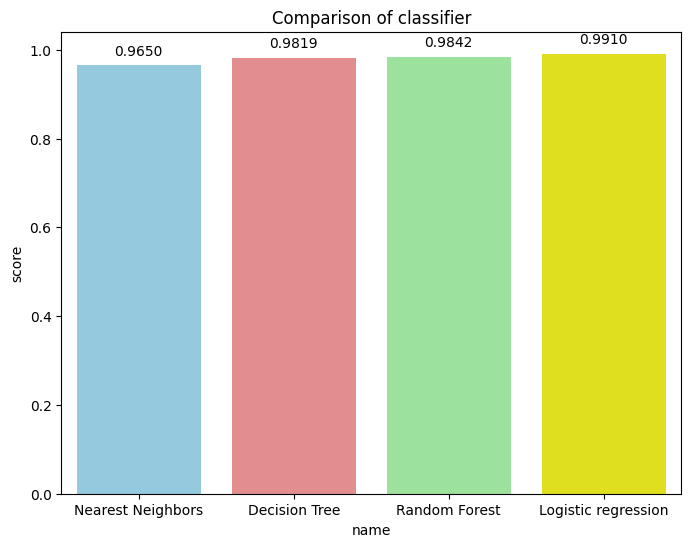

In [93]:
fig, ax = plt.subplots(figsize=(8, 6))

bar_colors = ['skyblue', 'lightcoral', 'lightgreen', 'yellow']

sns.barplot(x="name", y="score", data=data, ax=ax, palette=bar_colors, hue='name')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title("Comparison of classifier")
plt.show()

Nearest Neighbors (K-NN): Achieved an accuracy of approximately 96.5%. 

Decision Tree: Achieved an accuracy of approximately 98.2%. 

Random Forest: Achieved an accuracy of approximately 98.4%.

Logistic Regression: Achieved the highest accuracy of approximately 99.1%. 

In conclusion, the highest is logistic regression at 99.1%.